# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
clean_city_data_file = "output_data/cleancitydata.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
query_url = url + "&q=" + cities[0]
print(f"City = {cities[0]}")

# Get weather data
weather_response_json = requests.get(query_url).json()
weather_response_json

City = lebu


{'coord': {'lon': -73.65, 'lat': -37.62},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 49.05,
  'feels_like': 42.98,
  'temp_min': 49.05,
  'temp_max': 49.05,
  'pressure': 1024,
  'humidity': 82,
  'sea_level': 1024,
  'grnd_level': 1014},
 'visibility': 10000,
 'wind': {'speed': 8.23, 'deg': 217},
 'clouds': {'all': 62},
 'dt': 1595811229,
 'sys': {'country': 'CL', 'sunrise': 1595764738, 'sunset': 1595800980},
 'timezone': -14400,
 'id': 3883457,
 'name': 'Lebu',
 'cod': 200}

In [40]:
# List for holding latitudes, temperature, humidity, cloudiness, wind speed
citys = []
latitudes = []
longitudes = []
temps = []
humids = []
clouds = []
winds = []
city_ctr = 0 

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

for city in cities:
    city_ctr = city_ctr + 1
    query_url = url + "&q=" + city
    print(f"{city_ctr} {city}")
    # Get weather data
    weather_response_json = requests.get(query_url).json()
    try:
        citys.append(weather_response_json['name'])
        latitudes.append(weather_response_json['coord']['lat'])
        longitudes.append(weather_response_json['coord']['lon'])
        temps.append(weather_response_json['main']['temp_max'])
        humids.append(weather_response_json['main']['humidity'])
        clouds.append(weather_response_json['clouds']['all'])
        winds.append(weather_response_json['wind']['speed'])
    except:
        pass

1 lebu
2 cabinda
3 cabedelo
4 barentsburg
5 new norfolk
6 hobart
7 bonthe
8 smithers
9 barrow
10 tomatlan
11 cape town
12 bluff
13 hilo
14 nikolskoye
15 ushuaia
16 frontera
17 barawe
18 darnah
19 tucdao
20 provideniya
21 bandarbeyla
22 leningradskiy
23 yellowknife
24 pochutla
25 antofagasta
26 khatanga
27 saint-philippe
28 victoria
29 bur gabo
30 nanortalik
31 esperance
32 avarua
33 mataura
34 show low
35 kodiak
36 jamestown
37 manicore
38 rikitea
39 palabuhanratu
40 east london
41 saldanha
42 predejane
43 kavaratti
44 kapaa
45 marcona
46 cherskiy
47 busselton
48 puerto ayora
49 vilhena
50 hithadhoo
51 lawrenceburg
52 hamada
53 windhoek
54 lierneux
55 arraial do cabo
56 honningsvag
57 nyurba
58 lima
59 pevek
60 chapais
61 hunza
62 port lincoln
63 khonuu
64 zhigansk
65 aksarka
66 obo
67 longlac
68 tuktoyaktuk
69 lolua
70 copiapo
71 qaanaaq
72 sangueya
73 thompson
74 ngukurr
75 amderma
76 quelimane
77 umarkot
78 carnarvon
79 serravalle pistoiese
80 albany
81 jinchengjiang
82 cabo san luc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
weather_dict = {
    "city": citys,
    "latitude": latitudes,
    "longitude": longitudes,
    "temp": temps,
    "humid": humids,
    "cloud": clouds,
    "wind": winds
}
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df

,city,latitude,longitude,temp,humid,cloud,wind
0,Lebu,-37.62,-73.65,49.05,82,62,8.23
1,Cabinda,-5.55,12.20,71.28,86,0,6.33
2,Cabedelo,-6.98,-34.83,73.40,94,90,6.93
3,New Norfolk,-42.78,147.06,52.00,77,100,1.01
4,Hobart,-42.88,147.33,53.01,81,75,2.24
...,...,...,...,...,...,...,...
527,Tefé,-3.35,-64.71,76.93,76,28,1.03
528,Merrill,45.18,-89.68,80.60,74,1,6.93
529,Peterhead,57.51,-1.80,48.99,81,98,4.70
530,Hambantota,6.12,81.12,82.40,69,90,10.29


In [43]:
weather_data_df.to_csv(output_data_file, index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [44]:
humidity_lessthan_100_df = weather_data_df[weather_data_df["humid"].astype(float) <= 100]
humidity_lessthan_100_df

,city,latitude,longitude,temp,humid,cloud,wind
0,Lebu,-37.62,-73.65,49.05,82,62,8.23
1,Cabinda,-5.55,12.20,71.28,86,0,6.33
2,Cabedelo,-6.98,-34.83,73.40,94,90,6.93
3,New Norfolk,-42.78,147.06,52.00,77,100,1.01
4,Hobart,-42.88,147.33,53.01,81,75,2.24
...,...,...,...,...,...,...,...
527,Tefé,-3.35,-64.71,76.93,76,28,1.03
528,Merrill,45.18,-89.68,80.60,74,1,6.93
529,Peterhead,57.51,-1.80,48.99,81,98,4.70
530,Hambantota,6.12,81.12,82.40,69,90,10.29


In [45]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100_df = weather_data_df[weather_data_df["humid"].astype(float) > 100]
humidity_over_100_df.index.values

array([], dtype=int64)

In [46]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = weather_data_df.drop(humidity_over_100_df.index.values, inplace=False)
clean_city_data_df

,city,latitude,longitude,temp,humid,cloud,wind
0,Lebu,-37.62,-73.65,49.05,82,62,8.23
1,Cabinda,-5.55,12.20,71.28,86,0,6.33
2,Cabedelo,-6.98,-34.83,73.40,94,90,6.93
3,New Norfolk,-42.78,147.06,52.00,77,100,1.01
4,Hobart,-42.88,147.33,53.01,81,75,2.24
...,...,...,...,...,...,...,...
527,Tefé,-3.35,-64.71,76.93,76,28,1.03
528,Merrill,45.18,-89.68,80.60,74,1,6.93
529,Peterhead,57.51,-1.80,48.99,81,98,4.70
530,Hambantota,6.12,81.12,82.40,69,90,10.29


In [47]:
# Extract relevant fields from the data frame
clean_city_data = clean_city_data_df[["latitude","longitude","temp","humid","cloud","wind"]]

# Export the City_Data into a csv
clean_city_data.to_csv(clean_city_data_file, index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [48]:
# compute for the current date in mm/dd/yy format
from datetime import date

today = date.today()

mmddyy_format = today.strftime("%m/%d/%y")
print("mmddyy_format =", mmddyy_format)

mmddyy_format = 07/26/20


In [58]:
clean_city_data_df.head()

,city,latitude,longitude,temp,humid,cloud,wind
0,Lebu,-37.62,-73.65,49.05,82,62,8.23
1,Cabinda,-5.55,12.20,71.28,86,0,6.33
2,Cabedelo,-6.98,-34.83,73.40,94,90,6.93
3,New Norfolk,-42.78,147.06,52.00,77,100,1.01
4,Hobart,-42.88,147.33,53.01,81,75,2.24


In [59]:
clean_latitudes = clean_city_data_df["latitude"]
clean_temps = clean_city_data_df["temp"]
clean_humids = clean_city_data_df["humid"]
clean_clouds = clean_city_data_df["cloud"]
clean_winds = clean_city_data_df["wind"]

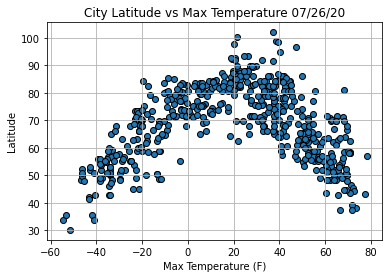

In [60]:
plt.scatter(clean_latitudes, clean_temps, marker="o", edgecolors="black")
plt.grid(True)
plt.title(f"City Latitude vs Max Temperature {mmddyy_format}")
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")

plt.savefig("Images/City Latitude vs Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

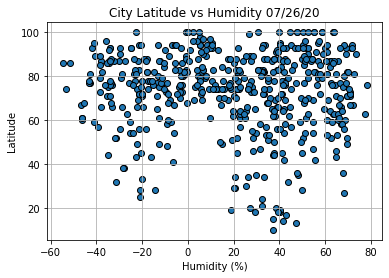

In [61]:
plt.scatter(clean_latitudes, clean_humids, marker="o", edgecolors="black")
plt.grid(True)
plt.title(f"City Latitude vs Humidity {mmddyy_format}")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")

plt.savefig("Images/City Latitude vs Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

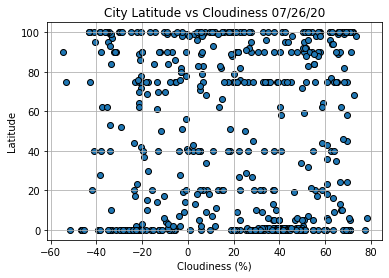

In [62]:
plt.scatter(clean_latitudes, clean_clouds, marker="o", edgecolors="black")
plt.grid(True)
plt.title(f"City Latitude vs Cloudiness {mmddyy_format}")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")

plt.savefig("Images/City Latitude vs Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

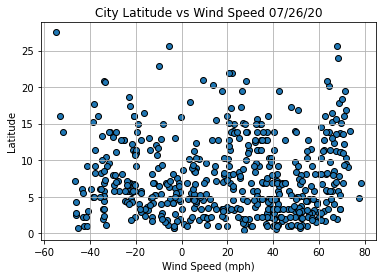

In [63]:
plt.scatter(clean_latitudes, clean_winds, marker="o", edgecolors="black")
plt.grid(True)
plt.title(f"City Latitude vs Wind Speed {mmddyy_format}")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")

plt.savefig("Images/City Latitude vs Wind Speed.png")
plt.show()

## Linear Regression

In [64]:
# OPTIONAL: Create a function to create Linear Regression plots

In [66]:
# Create Northern and Southern Hemisphere DataFrames
north_hem_weather_data_df = clean_city_data_df[clean_city_data_df["latitude"].astype(float) >= 0]
south_hem_weather_data_df = clean_city_data_df[clean_city_data_df["latitude"].astype(float) < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

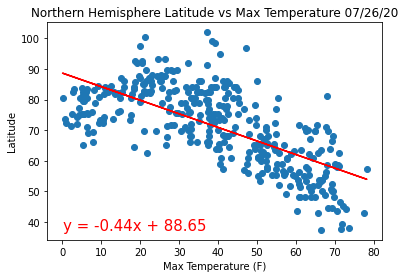

In [67]:
x_values = north_hem_weather_data_df["latitude"]
y_values = north_hem_weather_data_df["temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Northern Hemisphere Latitude vs Max Temperature {mmddyy_format}")
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

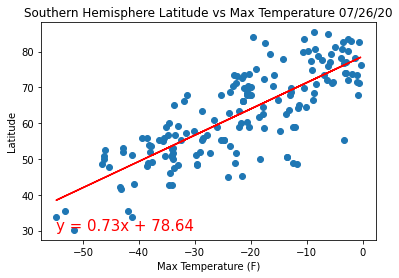

In [68]:
x_values = south_hem_weather_data_df["latitude"]
y_values = south_hem_weather_data_df["temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Southern Hemisphere Latitude vs Max Temperature {mmddyy_format}")
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

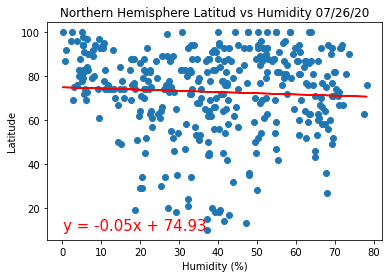

In [69]:
x_values = north_hem_weather_data_df["latitude"]
y_values = north_hem_weather_data_df["humid"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Northern Hemisphere Latitud vs Humidity {mmddyy_format}")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

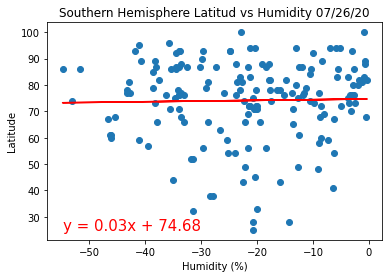

In [70]:
x_values = south_hem_weather_data_df["latitude"]
y_values = south_hem_weather_data_df["humid"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Southern Hemisphere Latitud vs Humidity {mmddyy_format}")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

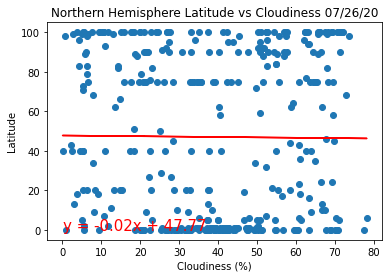

In [71]:
x_values = north_hem_weather_data_df["latitude"]
y_values = north_hem_weather_data_df["cloud"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Northern Hemisphere Latitude vs Cloudiness {mmddyy_format}")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

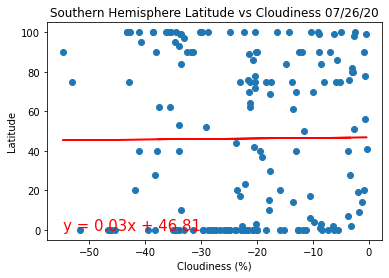

In [72]:
x_values = south_hem_weather_data_df["latitude"]
y_values = south_hem_weather_data_df["cloud"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Southern Hemisphere Latitude vs Cloudiness {mmddyy_format}")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

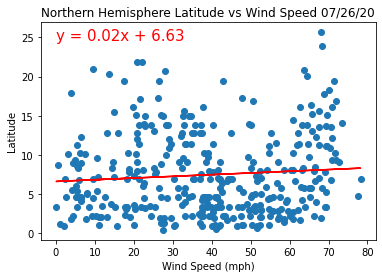

In [73]:
x_values = north_hem_weather_data_df["latitude"]
y_values = north_hem_weather_data_df["wind"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),max(y_values)-1),fontsize=15,color="red")

plt.title(f"Northern Hemisphere Latitude vs Wind Speed {mmddyy_format}")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

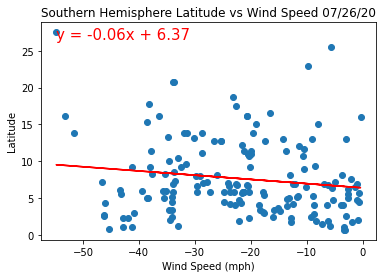

In [74]:
x_values = south_hem_weather_data_df["latitude"]
y_values = south_hem_weather_data_df["wind"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),max(y_values)-1),fontsize=15,color="red")

plt.title(f"Southern Hemisphere Latitude vs Wind Speed {mmddyy_format}")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.show()